In [14]:
import requests
import json
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:



congress_url = "https://dadosabertos.camara.leg.br/api/v2/"
current_year = datetime.now().year
years = list(range(current_year, 2007, -4))

def get_all_congress_members_year(year):
    print(f'------------{year}------------')
    try:
        if not os.path.exists(f'data/deputados-{year}.json'):
            all_members_response = requests.get(f'{congress_url}/deputados?dataInicio={year}-01-01&dataFim={year+3}-01-01')

            if(all_members_response.status_code == 200):
                with open(f'data/deputados-{year}.json', 'w', encoding='utf-8') as file:
                    json.dump(all_members_response.json(), file, ensure_ascii=False)
        else:
            print(f'File for year {year} already exists. Exiting')
    except:
        print('Error at request')


In [25]:
for year in years:
    get_all_congress_members_year(year)

------------2025------------
------------2021------------
------------2017------------
------------2013------------
------------2009------------


KeyError: 'siglaPartido'

In [ ]:
partidos_serie_historica = []

for year in years:
    
    with open(f'data/deputados-{year}.json', 'r', encoding='utf-8') as file:
        dado_ano = {}
        response = json.load(file)
        data = response['dados']
        
        for deputado in data:
            partido = deputado['siglaPartido']
            if partido not in dado_ano:
                dado_ano[partido] = 1
            else:
                dado_ano[partido] +=1
        partidos_serie_historica.append(dado_ano)
        
partidos_serie_historica_ordenado = []

for partido in partidos_serie_historica:
    partidos_ordenados = dict(sorted(partido.items(), key=lambda item: item[1], reverse=True)[:10])
    partidos_serie_historica_ordenado.append(partidos_ordenados)  


         PL   PT  UNIÃO    PP   PSD    PR   MDB   PSL   PMDB  PSDB    DEM
2025   96.0   73   66.0  52.0  49.0   NaN   NaN   NaN    NaN   NaN    NaN
2021  142.0   82  133.0  90.0  80.0   NaN   NaN   NaN    NaN   NaN    NaN
2017    NaN   61    NaN  72.0   NaN  63.0  63.0  60.0    NaN   NaN    NaN
2013    NaN  126    NaN   NaN  77.0  63.0   NaN   NaN  137.0  87.0    NaN
2009    NaN  155    NaN   NaN   NaN  75.0   NaN   NaN  159.0  98.0  102.0


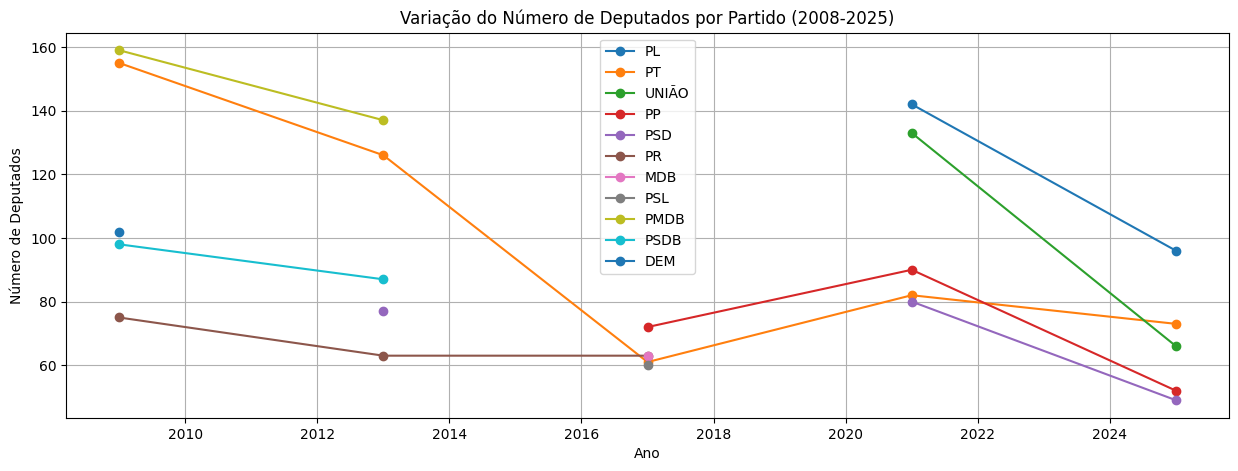

In [81]:


df = pd.DataFrame(partidos_serie_historica_ordenado, index=years)
print(df.head())

plt.figure(figsize=(15, 5))

for partido in  df.columns:
    
    plt.plot(df.index, df[partido], marker='o', linestyle='-', label=partido)

plt.xlabel("Ano")
plt.ylabel("Número de Deputados")
plt.title("Variação do Número de Deputados por Partido (2008-2025)")
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.show()

In [66]:


df_variacao = df.pct_change() * 100
df_variacao.head()




,PMDB,PT,DEM,PSDB,PR,PP**,PSB,PDT,PSD,PTB
2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
